## Making SPEA algorithm for arbitrary unitaries
- This is an implementation of the Statistical Phase Estimation algorithm for arbitrary unitaries.
- It aims to provide the user one of the **eigenvector-eigenphase** pair of the given unitary matrix.
- The hardware structure is quite similar to that of the IPE algorithm and uses the circuit present in the last stage of the IPE algorithm.
- A scipy class called **unitary_group** is used for sampling a random basis for the algorithm

In [1]:
from qiskit import QuantumCircuit, execute, transpile, Aer 
from qiskit.extensions import UnitaryGate,Initialize
from qiskit.tools.visualization import plot_histogram 
import numpy as np 
from time import sleep 
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Statevector 
import sys 
from scipy.stats import unitary_group 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
from normal_SPEA import SPEA 

## Testing the circuit
- With phase = 1/6 , we test the circuit and X gate

In [ ]:
from qiskit import IBMQ 
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education')
santiago = provider.get_backend('ibmq_santiago')
casablanca = provider.get_backend('ibmq_casablanca')


In [4]:
sim = Aer.get_backend('qasm_simulator')

In [5]:
U = UnitaryGate(data=np.array([[0,1],
                               [1,0]]))

In [6]:
U = UnitaryGate(data=np.array([[1,0],
                               [0, np.exp(2*np.pi*1j*(1/5))]]))

In [7]:
spe = SPEA(U,resolution= 40,error = 4,max_iters=15)

In [8]:
result = spe.get_eigen_pair(progress = True,algo = 'standard',backend = Aer.get_backend('qasm_simulator'),target_cost=0.9)

E:\ANACONDA\lib\site-packages\qiskit\circuit\quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


In [9]:
 result 
    # original theta = 0.2 

{'cost': 0.955078125,
 'theta': 0.15384615384615385,
 'state': array([ 0.38774284+0.04666234j, -0.88469129-0.25455734j])}

In [10]:
u2 = UnitaryGate(data=np.array([[1,0],
                               [0, np.exp(2*np.pi*1j*(1/5))]]))

In [101]:
t = []
for resolution in range(20,80,5):
    spe = SPEA(u2,resolution= resolution,max_iters=10)    
    res = spe.get_eigen_pair(backend = sim,algo = 'standard',target_cost = 0.94)
    theta = res['theta']
    t.append(theta)

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...


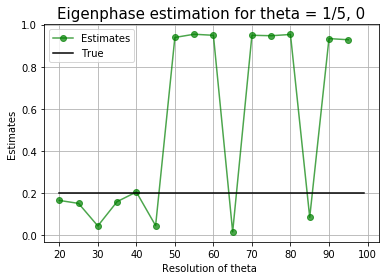

In [102]:
plt.title("Eigenphase estimation for theta = 1/5, 0",fontsize = 15)
plt.grid()
plt.plot(list(range(20,100,5)),t,marker = 'o',color='g',label = 'Estimates',alpha=0.7)
plt.plot(list(range(20,100,1)),[0.2 for i in range(20,100,1)],color='black',label = "True")
plt.legend()
plt.xlabel("Resolution of theta ")
plt.ylabel("Estimates")
plt.savefig("SPE_PLOT.jpg",dpi = 200)